In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
#Load the dataset
df = pd.read_csv('diabetes.csv')
#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#step 2:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
#Step 3: Split the Data into two parts train and test
#Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values
#importing train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(576, 8) (192, 8) (576,) (192,)


In [4]:
#Step4: Calculate Error rates for different k values using k-Nearest Neighbor algorithm
#Finding Error Rates while number of neighbors varies from 1 to 40
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate)


[0.3020833333333333, 0.296875, 0.3072916666666667, 0.2916666666666667, 0.296875, 0.2708333333333333, 0.2916666666666667, 0.2552083333333333, 0.2760416666666667, 0.265625, 0.28125, 0.2760416666666667, 0.2760416666666667, 0.2760416666666667, 0.28125, 0.28125, 0.2760416666666667, 0.2708333333333333, 0.2760416666666667, 0.2708333333333333, 0.2760416666666667, 0.2708333333333333, 0.2864583333333333, 0.265625, 0.2708333333333333, 0.2864583333333333, 0.28125, 0.296875, 0.2916666666666667, 0.3020833333333333, 0.3125, 0.3020833333333333, 0.296875, 0.2916666666666667, 0.3020833333333333, 0.296875, 0.3020833333333333, 0.296875, 0.3125]


Text(0, 0.5, 'Error Rate')

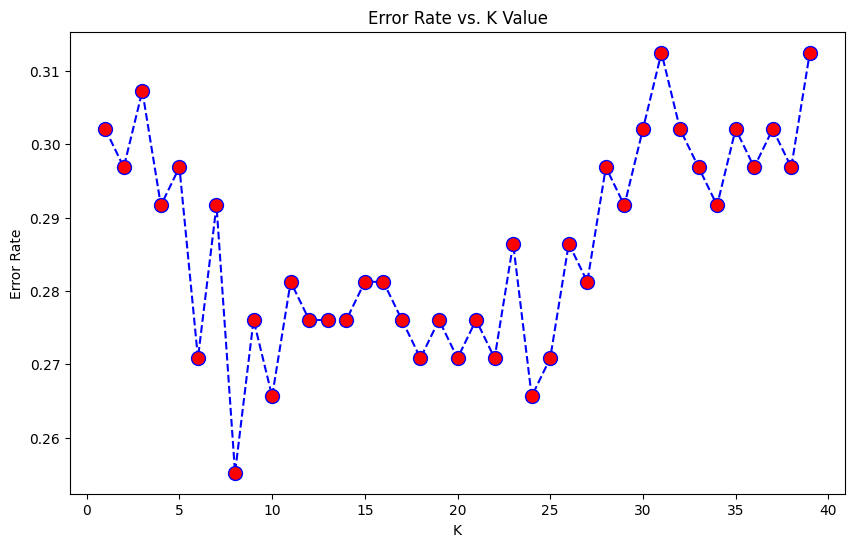

In [5]:
#Plot the error rates to find optimum k value
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [6]:
#step 6:Create and Train the Model with Training Data k-Nearest Neighbor algorithm with optimal k value and find the accuracy
# NOW WITH K=11
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(round(knn.score(X_test,y_test)*100,2),"%")

73.44 %


In [7]:
#Print the Classification Report
print("\n------------confusion----------------")
print(confusion_matrix(y_test,pred))
print("\n------------classification Report----------------")
print(classification_report(y_test,pred))



------------confusion----------------
[[109  15]
 [ 36  32]]

------------classification Report----------------
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       124
           1       0.68      0.47      0.56        68

    accuracy                           0.73       192
   macro avg       0.72      0.67      0.68       192
weighted avg       0.73      0.73      0.72       192



Created a Machine Learning model using k-Nearest Neighbor Algorithm, and tested the accuracy of the algorithm.